# 特徴量の選択のノートブック

## セットアップ

### ライブラリのインポート

In [1]:
import datarobot as dr

In [2]:
from datarobot_bp_workshop import Workshop, Visualize

In [3]:
with open('../api.token', 'r') as f:
    token = f.read()
    dr.Client(token=token, endpoint='https://app.datarobot.com/api/v2')

## 初期化する

In [4]:
w = Workshop()

## 特徴量選択ワークフロー

このセクションはプロジェクトによって異なります。


In [5]:
w = Workshop(project_id='5eb9656901f6bb026828f14e')

In [6]:
w.Features.Accident_Last2

Single Column Converter: 'Accident_Last2' (SCPICK)

Input Summary: Categorical Data
Output Method: TaskOutputMethod.TRANSFORM

Task Parameters:
  column_name (cn) = '4163636964656e745f4c61737432'

In [7]:
w.Feature('Insurance_Duration')

Single Column Converter: 'Insurance_Duration' (SCPICK)

Input Summary: Categorical Data
Output Method: TaskOutputMethod.TRANSFORM

Task Parameters:
  column_name (cn) = '496e737572616e63655f4475726174696f6e'

In [8]:
pni = w.Tasks.PNI2(w.Features.Age)
rdt = w.Tasks.RDT5(pni)
binning = w.Tasks.BINNING(pni)
keras = w.Tasks.KERASC(rdt, binning)
keras.set_task_parameters_by_name(learning_rate=0.123)
keras_blueprint = w.BlueprintGraph(keras, name='A blueprint I made with the Python API')

In [9]:
source_code = keras_blueprint.to_source_code(to_stdout=True)

w = Workshop(project_id='5eb9656901f6bb026828f14e')

age = w.Features.Age

pni2 = w.Tasks.PNI2(age)

binning = w.Tasks.BINNING(pni2)

rdt5 = w.Tasks.RDT5(pni2)

kerasc = w.Tasks.KERASC(binning, rdt5)
kerasc.set_task_parameters(learning_rate=0.123)

kerasc_blueprint = w.BlueprintGraph(kerasc, name='A blueprint I made with the Python API')


In [10]:
exec(compile(source_code, 'blueprint', 'exec'), locals())

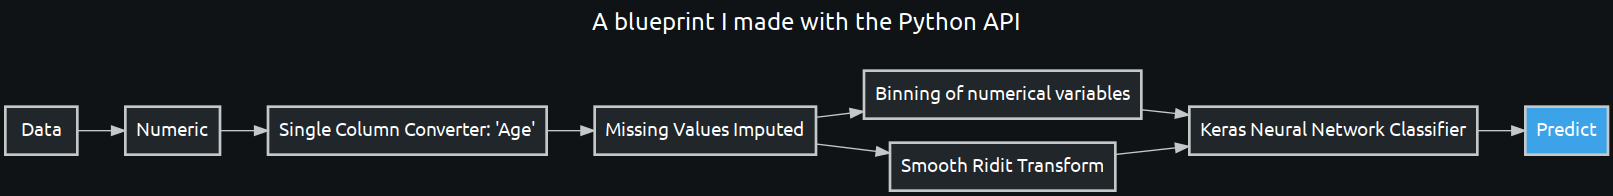

In [11]:
kerasc_blueprint.show()

In [12]:
w.set_project(project_id='605ab63ecd8a6669dfd64901')

In [14]:
kerasc_blueprint.train(w.project.id)

Name: 'A blueprint I made with the Python API'

Input Data: Numeric
Tasks: Single Column Converter: 'Age' | Missing Values Imputed | Binning of numerical variables | Smooth Ridit Transform | Keras Neural Network Classifier

In [101]:
starred_models = w.project.get_models(search_params=dict(is_starred=True))

In [102]:
model_to_clone = starred_models[0].blueprint_id

In [104]:
bp = w.clone(blueprint_id=model_to_clone, name='Now featuring selected columns!')

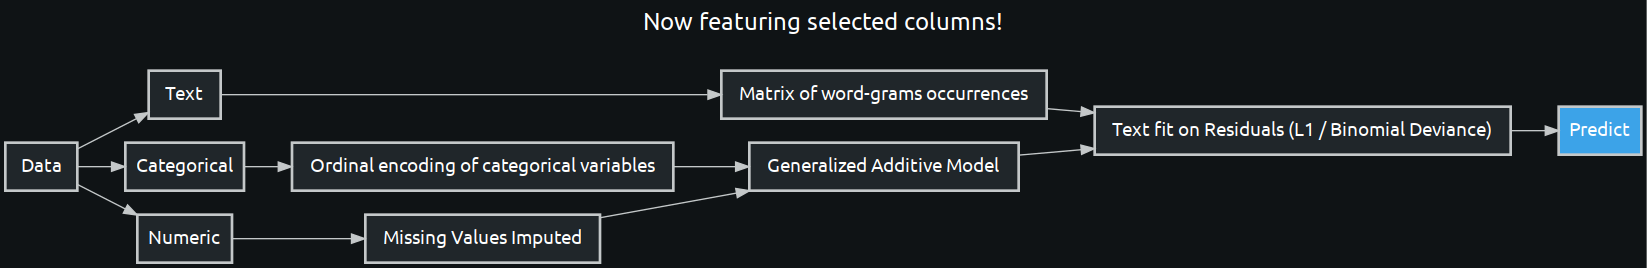

In [105]:
bp.show()

In [106]:
bp.delete()

Blueprint deleted.
